# CE-40717: Machine Learning

## HW7-Regression

### Please fill this part


1.   Full Name: Pouya Khani
2.   Student Number: 99210283

In [ ]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [ ]:
dataset = pd.read_csv("./ML2021S-HW7-data.csv")
dataset = dataset.drop(['num'],axis=1)
# implement the split part
# name them: x_train, x_test, y_train, y_test

x_train = dataset.iloc[:int(0.8*len(dataset)),0]
y_train = dataset.iloc[:int(0.8*len(dataset)),1]

x_test = dataset.iloc[int(0.8*len(dataset)):,0]
y_test = dataset.iloc[int(0.8*len(dataset)):,1]

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [ ]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
def least_squares(x,y):
    xmean=x.mean()
    ymean=y.mean()
    num=((x-xmean)*(y-ymean)).sum(axis=0)
    den=((x-x.mean())**2).sum(axis=0)
    weight=num/den
    bias=ymean-(weight*xmean)
    return weight,bias

weight,bias=least_squares(x_train,y_train)
m=np.zeros(2)
m[0]=weight
m[1]=bias

In [ ]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]
def mse(true,pred):
    return np.mean((pred-true)**2)

train_error = mse(y_train,predicted_train_y)
test_error = mse(y_test,predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.32467763017774204
MSE test error: 0.354495119213003


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

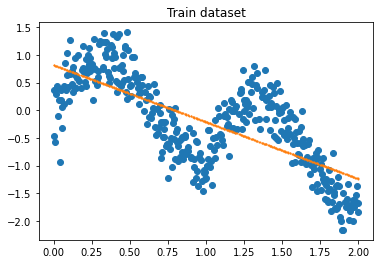

In [ ]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

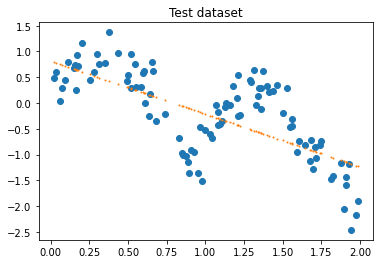

In [ ]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

1- No this is not acceptable accuracy because MSE error is too high.

2- Because of the non-linear nature of our dataset,our linear classifier can't classify our data good.

3- this line is good for dataset but problem is that data distribution is not linearly seperatable and linear regression can't do well.

4- problems: data is not linearly seperatable and linear regression can't classify those with good accuracy.we need non-linear approachs for more complex classifier.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

No due to merging in this approach, finally we will have linear regression.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [ ]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i in range(l): 
        xi = train_dataset[i] 
        d = (-2 * hyperparameter * hyperparameter) 
        W[i, i] = np.exp(np.dot((xi-the_query_point), (xi-the_query_point).T)/d)
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [ ]:
def predict(train_X, train_Y, query_x, hyperparameter):
    train_X = np.array(train_X.values.tolist())
    train_Y = np.array(train_Y.values.tolist())
    l = train_X.shape[0]
    train_X = train_X.reshape(l,1)
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    theta = np.linalg.pinv(X.T*(W * X))*(X.T*(W * train_Y.reshape(l,1)))
    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [ ]:
predicted_test = [predict(x_train, y_train, query, 100) for query in x_test]
error = mse(y_test,np.array(predicted_test).flatten())
print(f"MSE test error: {error}")

MSE test error: 0.35449462807476956


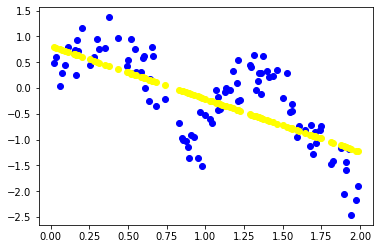

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

No because in locally weighted regression we must merge all local regression to one linear one and this is bad for our dataset.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

yes because KNN see neighbors just for prediction and make a non-linear model

### Part10:
Implementing the `KNN model`.

In [ ]:
class KNN:
  def __init__(self, number_neighbours, X, Y):
    self.k = number_neighbours
    self.X = X
    self.Y = Y

  def distance(self, x1, x2):
    distance = np.absolute(x1 - x2)
    return distance

  def return_nn_ids(self, x):
    distances = np.empty((0 , 2),float)
    for id,train_row in enumerate(self.X):
      dist = self.distance(x, train_row)
      distances = np.append(distances,np.array([[id,dist]]),axis=0)
    distances = distances[distances[:,1].argsort()]
    neighbors = list()
    for i in range(self.k):
      neighbors.append(distances[i][0])
    return neighbors

  def predict(self, x):
    nearest_indices = self.return_nn_ids(x)
    sum = 0.0
    for i,index in enumerate(nearest_indices):
      sum = sum + self.Y[index]
    sum = sum / len(nearest_indices)
    predicted_y = sum
    return predicted_y

In [ ]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mse(y_test,predicted_y)
    return error, predicted_y

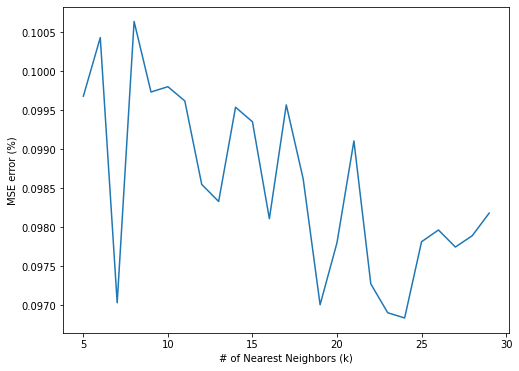

In [ ]:
mse_all = []

for k in range(5,30):
  error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
  mse_all.append(error_knn)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(5,30), mse_all)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('MSE error (%)');

In [ ]:
error_knn, predicted_y = evaluation(24, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09683341559345626


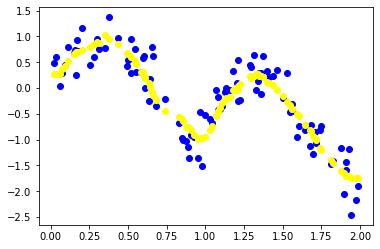

In [ ]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Yes because of locality nature of KNN(local,non-linear) , we get very good MSE error. best K is 24 due to plotting.